In [9]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/ml_projects/ey_nextwave0"
# base_dir = root_dir + '/'

Mounted at /content/gdrive


In [0]:
%reload_ext autoreload
%autoreload 2

In [0]:
#
from fastai.collab import *
from fastai.tabular import *

In [12]:
#
path = Path(root_dir + '/data/')
path

PosixPath('/content/gdrive/My Drive/ml_projects/ey_nextwave0/data')

In [13]:
# creates a train dataframe
train_df = pd.read_csv(path/'data_train.csv',
                      parse_dates = ['time_entry', 'time_exit'])

#
train_df.drop(['Unnamed: 0'],axis=1,inplace=True)

train_df['city_center'] = np.where(
    (train_df['x_entry'] >= 3750901.5068) & (train_df['x_entry'] <= 3770901.5068) &
    (train_df['y_entry'] >= -19268905.6133) & (train_df['y_entry'] <= -19208905.6133), 
    1, 0)

#
# train_df = train_df.sample(n=80000)

train_df.head(5)

,hash,trajectory_id,time_entry,time_exit,vmax,vmin,vmean,x_entry,y_entry,x_exit,y_exit,city_center
0,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_0,2019-04-19 07:04:31,2019-04-19 07:08:32,NaN,NaN,NaN,3.751014e+06,-1.909398e+07,3.750326e+06,-1.913634e+07,0
1,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_1,2019-04-19 07:20:34,2019-04-19 07:25:42,NaN,NaN,NaN,3.743937e+06,-1.932247e+07,3.744975e+06,-1.931966e+07,0
2,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_2,2019-04-19 07:53:32,2019-04-19 08:03:25,NaN,NaN,NaN,3.744868e+06,-1.929356e+07,3.744816e+06,-1.929284e+07,0
3,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_3,2019-04-19 08:17:50,2019-04-19 08:37:23,NaN,NaN,NaN,3.744880e+06,-1.929229e+07,3.744809e+06,-1.929049e+07,0
4,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_4,2019-04-19 14:38:09,2019-04-19 14:38:09,NaN,NaN,NaN,3.744909e+06,-1.928558e+07,3.744909e+06,-1.928558e+07,0


In [14]:
# resets the index
train_df = train_df.reset_index(drop=True)

train_df.drop(['x_exit', 'y_exit'], axis=1, inplace=True)

train_df.head(5)

,hash,trajectory_id,time_entry,time_exit,vmax,vmin,vmean,x_entry,y_entry,city_center
0,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_0,2019-04-19 07:04:31,2019-04-19 07:08:32,NaN,NaN,NaN,3.751014e+06,-1.909398e+07,0
1,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_1,2019-04-19 07:20:34,2019-04-19 07:25:42,NaN,NaN,NaN,3.743937e+06,-1.932247e+07,0
2,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_2,2019-04-19 07:53:32,2019-04-19 08:03:25,NaN,NaN,NaN,3.744868e+06,-1.929356e+07,0
3,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_3,2019-04-19 08:17:50,2019-04-19 08:37:23,NaN,NaN,NaN,3.744880e+06,-1.929229e+07,0
4,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_4,2019-04-19 14:38:09,2019-04-19 14:38:09,NaN,NaN,NaN,3.744909e+06,-1.928558e+07,0


In [15]:
# selects the saledate column and creates new datetime columns
add_datepart(train_df, 'time_entry')
add_datepart(train_df, 'time_exit')

,hash,trajectory_id,vmax,vmin,vmean,x_entry,y_entry,city_center,time_entryYear,time_entryMonth,...,time_exitDay,time_exitDayofweek,time_exitDayofyear,time_exitIs_month_end,time_exitIs_month_start,time_exitIs_quarter_end,time_exitIs_quarter_start,time_exitIs_year_end,time_exitIs_year_start,time_exitElapsed
0,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_0,NaN,NaN,NaN,3.751014e+06,-1.909398e+07,0,2019,4,...,19,4,109,False,False,False,False,False,False,1555657712
1,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_1,NaN,NaN,NaN,3.743937e+06,-1.932247e+07,0,2019,4,...,19,4,109,False,False,False,False,False,False,1555658742
2,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_2,NaN,NaN,NaN,3.744868e+06,-1.929356e+07,0,2019,4,...,19,4,109,False,False,False,False,False,False,1555661005
3,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_3,NaN,NaN,NaN,3.744880e+06,-1.929229e+07,0,2019,4,...,19,4,109,False,False,False,False,False,False,1555663043
4,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_4,NaN,NaN,NaN,3.744909e+06,-1.928558e+07,0,2019,4,...,19,4,109,False,False,False,False,False,False,1555684689
5,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_5,NaN,NaN,NaN,3.744945e+06,-1.928183e+07,0,2019,4,...,19,4,109,False,False,False,False,False,False,1555687113
6,0000cf177130469eeac79f67b6bcf3df_9,traj_0000cf177130469eeac79f67b6bcf3df_9_0,0.000000,0.000000,0.000000,3.749450e+06,-1.926506e+07,0,2019,4,...,19,4,109,False,False,False,False,False,False,1555684163
7,0000cf177130469eeac79f67b6bcf3df_9,traj_0000cf177130469eeac79f67b6bcf3df_9_1,0.000000,0.000000,0.000000,3.749090e+06,-1.926726e+07,0,2019,4,...,19,4,109,False,False,False,False,False,False,1555684789
8,0000cf177130469eeac79f67b6bcf3df_9,traj_0000cf177130469eeac79f67b6bcf3df_9_2,0.507809,0.507809,0.507809,3.749042e+06,-1.926632e+07,0,2019,4,...,19,4,109,False,False,False,False,False,False,1555685414
9,0000cf177130469eeac79f67b6bcf3df_9,traj_0000cf177130469eeac79f67b6bcf3df_9_3,1.149404,1.149404,1.149404,3.749088e+06,-1.926605e+07,0,2019,4,...,19,4,109,False,False,False,False,False,False,1555687788


In [16]:
# lists the columns in the dataframe
train_df.columns

Index(['hash', 'trajectory_id', 'vmax', 'vmin', 'vmean', 'x_entry', 'y_entry',
       'city_center', 'time_entryYear', 'time_entryMonth', 'time_entryWeek',
       'time_entryDay', 'time_entryDayofweek', 'time_entryDayofyear',
       'time_entryIs_month_end', 'time_entryIs_month_start',
       'time_entryIs_quarter_end', 'time_entryIs_quarter_start',
       'time_entryIs_year_end', 'time_entryIs_year_start', 'time_entryElapsed',
       'time_exitYear', 'time_exitMonth', 'time_exitWeek', 'time_exitDay',
       'time_exitDayofweek', 'time_exitDayofyear', 'time_exitIs_month_end',
       'time_exitIs_month_start', 'time_exitIs_quarter_end',
       'time_exitIs_quarter_start', 'time_exitIs_year_end',
       'time_exitIs_year_start', 'time_exitElapsed'],
      dtype='object')

In [0]:
#
procs=[FillMissing, Categorify, Normalize]

In [0]:
# categorical/continuous variables must be created to create a databunch
cat_vars = ['hash', 'trajectory_id', 'time_entryYear', 'time_entryMonth',
       'time_entryWeek', 'time_entryDay', 'time_entryDayofweek',
       'time_entryDayofyear', 'time_entryIs_month_end',
       'time_entryIs_month_start', 'time_entryIs_quarter_end',
       'time_entryIs_quarter_start', 'time_entryIs_year_end',
       'time_entryIs_year_start', 'time_entryElapsed', 'time_exitYear',
       'time_exitMonth', 'time_exitWeek', 'time_exitDay', 'time_exitDayofweek',
       'time_exitDayofyear', 'time_exitIs_month_end',
       'time_exitIs_month_start', 'time_exitIs_quarter_end',
       'time_exitIs_quarter_start', 'time_exitIs_year_end',
       'time_exitIs_year_start', 'time_exitElapsed']

cont_vars = ['vmax', 'vmin', 'vmean', 'x_entry', 'y_entry']

In [0]:
# dependent variable
dep_var = 'city_center'

# final dataframe
df = train_df[cat_vars + cont_vars + [dep_var]].copy()

In [20]:
df.head(3)

,hash,trajectory_id,time_entryYear,time_entryMonth,time_entryWeek,time_entryDay,time_entryDayofweek,time_entryDayofyear,time_entryIs_month_end,time_entryIs_month_start,...,time_exitIs_quarter_start,time_exitIs_year_end,time_exitIs_year_start,time_exitElapsed,vmax,vmin,vmean,x_entry,y_entry,city_center
0,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_0,2019,4,16,19,4,109,False,False,...,False,False,False,1555657712,NaN,NaN,NaN,3.751014e+06,-1.909398e+07,0
1,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_1,2019,4,16,19,4,109,False,False,...,False,False,False,1555658742,NaN,NaN,NaN,3.743937e+06,-1.932247e+07,0
2,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_2,2019,4,16,19,4,109,False,False,...,False,False,False,1555661005,NaN,NaN,NaN,3.744868e+06,-1.929356e+07,0


In [21]:
cut1 = train_df['city_center'][(train_df['city_center'] == train_df['city_center'][335])].index.max()

cut1

814243

In [22]:
 # test dataframe
test_df = pd.read_csv(path/'test_df.csv')

test_df.head(3)

,hash,trajectory_id,vmax,vmin,vmean,x_entry,y_entry,time_entryYear,time_entryMonth,time_entryWeek,...,time_exitDay,time_exitDayofweek,time_exitDayofyear,time_exitIs_month_end,time_exitIs_month_start,time_exitIs_quarter_end,time_exitIs_quarter_start,time_exitIs_year_end,time_exitIs_year_start,time_exitElapsed
0,00032f51796fd5437b238e3a9823d13d_31,traj_00032f51796fd5437b238e3a9823d13d_31_5,NaN,NaN,NaN,3.773118e+06,-1.914490e+07,2019,4,16,...,18,3,108,False,False,False,False,False,False,1555600232
1,000479418b5561ab694a2870cc04fd43_25,traj_000479418b5561ab694a2870cc04fd43_25_10,NaN,NaN,NaN,3.769978e+06,-1.934136e+07,2019,4,16,...,18,3,108,False,False,False,False,False,False,1555601456
2,000506a39775e5bca661ac80e3f466eb_29,traj_000506a39775e5bca661ac80e3f466eb_29_5,NaN,NaN,NaN,3.757468e+06,-1.923860e+07,2019,4,16,...,18,3,108,False,False,False,False,False,False,1555601168


In [23]:
# valid_idx = range(500)

train_df_len = len(train_df)

test_df_len = len(test_df)

# valid_idx = range(round(0.99 * train_df_len), train_df_len)

valid_idx = range(test_df_len)

valid_idx

range(0, 33515)

## Databunch generation

In [0]:
data = (TabularList.from_df(df, path=path, cat_names=cat_vars, cont_names=cont_vars, procs=procs)
                .split_by_idx(valid_idx)
                
                
                 # label_cls = FloatList informs fastai that this is a regression problem
                 # log due to RMSE 
                .label_from_df(cols = dep_var)
        
                .add_test(TabularList.from_df(test_df, path=path, cat_names=cat_vars, cont_names=cont_vars, procs=procs))
                .databunch())

In [25]:
data.show_batch(rows=5)

hash,trajectory_id,time_entryYear,time_entryMonth,time_entryWeek,time_entryDay,time_entryDayofweek,time_entryDayofyear,time_entryIs_month_end,time_entryIs_month_start,time_entryIs_quarter_end,time_entryIs_quarter_start,time_entryIs_year_end,time_entryIs_year_start,time_entryElapsed,time_exitYear,time_exitMonth,time_exitWeek,time_exitDay,time_exitDayofweek,time_exitDayofyear,time_exitIs_month_end,time_exitIs_month_start,time_exitIs_quarter_end,time_exitIs_quarter_start,time_exitIs_year_end,time_exitIs_year_start,time_exitElapsed,vmax_na,vmin_na,vmean_na,vmax,vmin,vmean,x_entry,y_entry,target
297f8fc6dd047f1b52bf042f5053a545_23,traj_297f8fc6dd047f1b52bf042f5053a545_23_1,2019,4,16,19,4,109,False,False,False,False,False,False,1555656584,2019,4,16,19,4,109,False,False,False,False,False,False,1555656584,False,False,False,-0.4154,-0.4154,-0.4234,1.0216,-1.1470,0
909ead7a0fbe66bf572fdf7728f6dc45_19,traj_909ead7a0fbe66bf572fdf7728f6dc45_19_5,2019,4,16,19,4,109,False,False,False,False,False,False,1555671721,2019,4,16,19,4,109,False,False,False,False,False,False,1555672123,True,True,True,-0.1903,-0.1737,-0.1903,1.0631,-0.9303,0
ffeee86012307a25771d55ff6cc46e1e_23,traj_ffeee86012307a25771d55ff6cc46e1e_23_0,2019,4,16,19,4,109,False,False,False,False,False,False,1555647106,2019,4,16,19,4,109,False,False,False,False,False,False,1555648255,False,False,False,-0.1903,-0.1737,-0.1903,-0.7231,2.0468,0
50032112c79e631be45eea0cafe831e1_29,traj_50032112c79e631be45eea0cafe831e1_29_4,2019,4,16,19,4,109,False,False,False,False,False,False,1555676580,2019,4,16,19,4,109,False,False,False,False,False,False,1555676580,True,True,True,-0.1903,-0.1737,-0.1903,-0.2817,-0.2449,1
35efa45afa0619e589ad07476e8c2288_9,traj_35efa45afa0619e589ad07476e8c2288_9_3,2019,4,16,19,4,109,False,False,False,False,False,False,1555686672,2019,4,16,19,4,109,False,False,False,False,False,False,1555686672,True,True,True,-0.1903,-0.1737,-0.1903,0.0785,2.0746,0


In [0]:
# creates a tabular learner
# regularisation can be used to ensure the model doesn't overfit
# ps - provides dropout
# emb_drop provides embedding dropout
# dropout is a form of regularization


learn = tabular_learner(data, layers=[200,100],
                        ps=[0.001, 0.01], emb_drop=0.04,
                        metrics = accuracy)

In [0]:
# finds the learning rate
learn.lr_find()

In [0]:
# 
learn.recorder.plot()

In [0]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(46505, 600)
    (1): Embedding(58801, 600)
    (2): Embedding(2, 2)
    (3): Embedding(2, 2)
    (4): Embedding(2, 2)
    (5): Embedding(2, 2)
    (6): Embedding(2, 2)
    (7): Embedding(2, 2)
    (8): Embedding(2, 2)
    (9): Embedding(2, 2)
    (10): Embedding(2, 2)
    (11): Embedding(2, 2)
    (12): Embedding(2, 2)
    (13): Embedding(2, 2)
    (14): Embedding(30882, 523)
    (15): Embedding(2, 2)
    (16): Embedding(2, 2)
    (17): Embedding(2, 2)
    (18): Embedding(2, 2)
    (19): Embedding(2, 2)
    (20): Embedding(2, 2)
    (21): Embedding(2, 2)
    (22): Embedding(2, 2)
    (23): Embedding(2, 2)
    (24): Embedding(2, 2)
    (25): Embedding(2, 2)
    (26): Embedding(2, 2)
    (27): Embedding(30936, 523)
    (28): Embedding(3, 3)
    (29): Embedding(3, 3)
    (30): Embedding(3, 3)
  )
  (emb_drop): Dropout(p=0.04)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequ

In [0]:
learn.fit(4, 1e-1)

epoch,train_loss,valid_loss,accuracy,time
0,0.197607,0.332216,0.948333,00:43
1,0.099082,0.107200,0.963333,00:43
2,0.113840,0.109537,0.960000,00:43
3,0.135001,0.252082,0.925000,00:43


In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


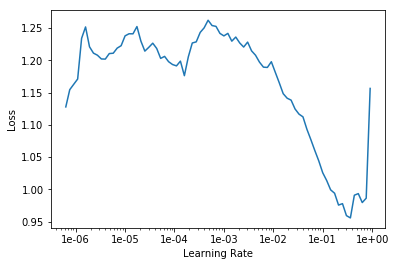

In [0]:
learn.recorder.plot()

In [0]:
learn.fit(4, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.189305,0.167383,0.939167,00:43
1,0.103596,0.113082,0.958333,00:43
2,0.070968,0.090050,0.963333,00:43
3,0.045121,0.096437,0.961667,00:43


(Category 1, tensor(1), tensor([3.0772e-04, 9.9969e-01]))

In [0]:
#
preds = learn.get_preds(ds_type=DatasetType.Test)

#
target_preds = preds[0][:,0]

In [0]:
test_df['id'] = test_df['trajectory_id']

test_df['target'] = target_preds

In [0]:
test_df = test_df[['id', 'target']]


#
test_df.loc[test_df['target'] < 1, 'target'] = 0

test_df

,id,target
0,traj_00032f51796fd5437b238e3a9823d13d_31_5,1.0
1,traj_000479418b5561ab694a2870cc04fd43_25_10,0.0
2,traj_000506a39775e5bca661ac80e3f466eb_29_5,0.0
3,traj_0005401ceddaf27a9b7f0d42ef1fbe95_1_4,0.0
4,traj_00063a4f6c12e1e4de7d876580620667_3_4,0.0
5,traj_0006535be25bb52dd06983447880c964_5_12,1.0
6,traj_0006f84bb33ec929d1cda7686f861d0a_31_3,0.0
7,traj_00093ae562586aed0e053b8431e8ace4_23_10,0.0
8,traj_000c739e444a70e1804d757a0580caaa_31_3,0.0
9,traj_000d479078af08618bddc7f09082b8c3_11_6,0.0


In [0]:
# creates a test dataframe
test_df.to_csv(path/'nextwave_submission.csv')

In [0]:
from google.colab import files

test_df.to_csv('submission_nextwave.csv', index=False)
files.download('submission_nextwave.csv')

In [0]:
test_df

,id,target
0,traj_00032f51796fd5437b238e3a9823d13d_31_5,1.0
1,traj_000479418b5561ab694a2870cc04fd43_25_10,0.0
2,traj_000506a39775e5bca661ac80e3f466eb_29_5,0.0
3,traj_0005401ceddaf27a9b7f0d42ef1fbe95_1_4,0.0
4,traj_00063a4f6c12e1e4de7d876580620667_3_4,0.0
5,traj_0006535be25bb52dd06983447880c964_5_12,1.0
6,traj_0006f84bb33ec929d1cda7686f861d0a_31_3,0.0
7,traj_00093ae562586aed0e053b8431e8ace4_23_10,0.0
8,traj_000c739e444a70e1804d757a0580caaa_31_3,0.0
9,traj_000d479078af08618bddc7f09082b8c3_11_6,0.0
